In [90]:
#!pip install facenet-pytorch

In [91]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
workers = 0 if os.name == 'nt' else 4

#### Determine if an nvidia GPU is available

In [92]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module


In [93]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

#### Define Inception Resnet V1 module


In [94]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

#### Define a dataset and data loader

We add the `idx_to_class` attribute to the dataset to enable easy recoding of label indices to identity names later on.

In [95]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('images')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

#### Perfom MTCNN facial detection


#### Calculate image embeddings and check the difference


In [96]:
def is_same_person(x1, x2):
    plt.subplot(1, 2, 1)
    plt.imshow(x1)
    plt.subplot(1, 2, 2)
    plt.imshow(x2)
    x_aligned_1, prob_1 = mtcnn(x1, return_prob=True)
    x_aligned_2, prob_2 = mtcnn(x2, return_prob=True)
    aligned = torch.stack([x_aligned_1, x_aligned_2]).to(device)
    embeddings = resnet(aligned).detach().cpu()
    dist = (embeddings[0] - embeddings[1]).norm().item()

    if dist < 0.75:
        print("It's the same person")
    else:
      print("It's not the same person")

In [97]:
images = []

for features, label in loader:
    images.append(features)

It's the same person


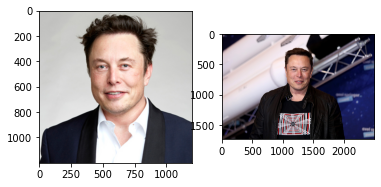

In [98]:
is_same_person(images[0], images[1])

It's not the same person


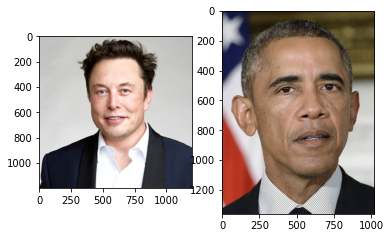

In [99]:
is_same_person(images[0], images[2])

It's the same person


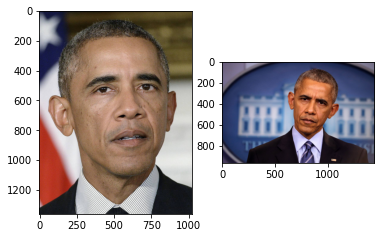

In [100]:
is_same_person(images[2], images[3])

It's not the same person


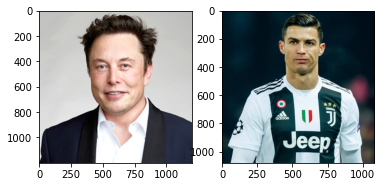

In [106]:
is_same_person(images[0], images[4])

It's not the same person


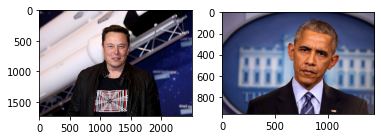

In [102]:
is_same_person(images[1], images[3])

It's not the same person


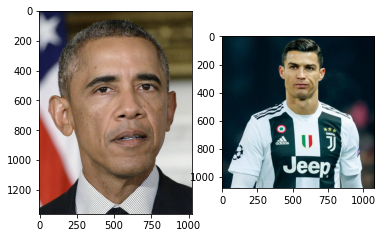

In [105]:
is_same_person(images[2], images[4])